There is a very interesting test for publication bias. It is based on analysis of result distribution across multiple sources measuring the same thing.

Assume that there are $N$ publications performing more or less the same analysis. Assume that there are two distributions - the testing and the null distribution. A set number $M$ of samples will be drawn from each, and then a standard t-test will be applied to determine if the means of the two distributions are different

$X_1 \sim \mathcal{N}(\mu_1, \sigma)$

$X_2 \sim \mathcal{N}(\mu_2, \sigma)$

Firstly, one can observe that for the t-test there is no improvement in performance with increasing sample size. If only presence of the effect is of importance, but not magnitude, even for a very large sample size the test can conclude that there is a significant difference. If there is a sizeable effect, it is clear that the p-value drops significantly with increasing sample size.

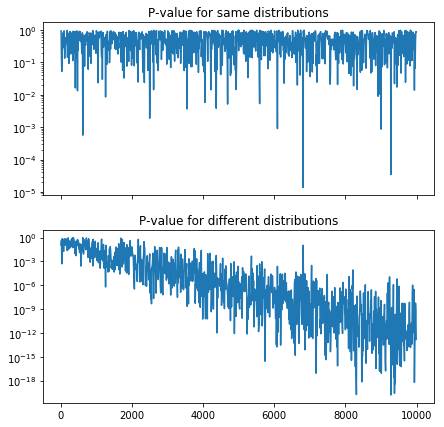

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = list(range(10, 10000, 10))
y1 = []
y2 = []

for i in x:
    rvs1 = stats.norm.rvs(loc=0,scale=1,size=i)
    rvs2 = stats.norm.rvs(loc=0,scale=1,size=i)
    rvs3 = stats.norm.rvs(loc=0.1,scale=1,size=i)
    y1.append(stats.ttest_ind(rvs1,rvs2)[1])
    y2.append(stats.ttest_ind(rvs1,rvs3)[1])


f, axarr = plt.subplots(2,figsize=(7,7), sharex=True)
axarr[0].semilogy(x,y1)
axarr[0].set_title('P-value for same distributions')
axarr[1].semilogy(x,y2)
axarr[1].set_title('P-value for different distributions')
plt.show()

Now the interesting question is if the presence of the effect can be determined from the distribution of the publications. Below it is obvious that if the effect is present, there must be many more publications with high p-values than with low p-values.

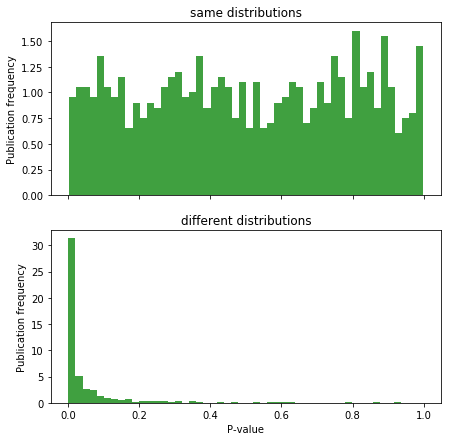

In [5]:
import random
x = [random.randint(1000, 2000) for i in range(1000)]
y1 = []
y2 = []

for i in x:
    rvs1 = stats.norm.rvs(loc=0,scale=1,size=i)
    rvs2 = stats.norm.rvs(loc=0,scale=1,size=i)
    rvs3 = stats.norm.rvs(loc=0.1,scale=1,size=i)
    y1.append(stats.ttest_ind(rvs1,rvs2)[1])
    y2.append(stats.ttest_ind(rvs1,rvs3)[1])
    
f, axarr = plt.subplots(2,figsize=(7,7), sharex=True)
axarr[0].hist(y1, 50, density=True, facecolor='g', alpha=0.75)
axarr[0].set_title('same distributions')
axarr[0].set_ylabel('Publication frequency')
axarr[1].hist(y2, 50, density=True, facecolor='g', alpha=0.75)
axarr[1].set_title('different distributions')
axarr[1].set_ylabel('Publication frequency')
axarr[1].set_xlabel('P-value')
plt.show()